<h1>Text Sentiment Analysis for Twitter Posts</h1>

Objective:
- Find out the different sentiment levels (negative, neutral, positive) among the posts and generate word clouds to discover key motivations / beliefs driving the sentiments

In [1]:
# pip install vaderSentiment

In [2]:
# pip install boto3

In [3]:
# pip install seaborn --upgrade

In [4]:
import pandas as pd
import numpy as np
import os
import re
import plotly.express as px
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns
import matplotlib.style as style
import matplotlib
import matplotlib.pyplot as plt
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from wordcloud import WordCloud

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/jlrqq/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [5]:
analyser = SentimentIntensityAnalyzer()

In [6]:
# https://github.com/cjhutto/vaderSentiment#about-the-scoring
# positive sentiment: compound score >= 0.05
# neutral sentiment: (compound score > -0.05) and (compound score < 0.05)
# negative sentiment: compound score <= -0.05

def sentiment_analyzer_score(sentence):
    score = analyser.polarity_scores(sentence)
    return score['compound']

In [7]:
# Read Twitter Data from Local CSV

tweets = pd.read_csv('../Twitter_Data/Twitter_Jan_Mar_5000.csv', index_col=0)

print(tweets.shape)
tweets.head()

(1335, 5)


,Tweet Id,Text,Username,Coordinates,Place
Datetime,,,,,
2020-03-01 23:54:33+00:00,1234265800363646982,Coronavirus: Washington state nursing home pla...,Asitseemstome,NaN,NaN
2020-03-01 23:16:50+00:00,1234256311606489089,@amybruni @JohnDePetroshow @NewportBuzz Someon...,LaGringaLoca666,NaN,NaN
2020-03-01 23:16:01+00:00,1234256103090933760,@luispedrocoelho Here's how the #coronavirus s...,NccAcc,NaN,NaN
2020-03-01 22:46:54+00:00,1234248779504726017,Tourists staying at a Tenerife hotel that has ...,Apex_WW,NaN,NaN
2020-03-01 22:45:18+00:00,1234248374720835584,We don't have a clue.\nOnly thing we saw is Ch...,AnjaLenaerts,NaN,NaN


In [8]:
# Read Twitter Data from S3 

# import pandas as pd
# import boto3
# import io

# AWS_ACCESS_KEY_ID = "*"
# AWS_SECRET_ACCESS_KEY = "*"
# bucket = "is434-last-sem-best-sem"
# file_name = "data-lake/tweeter_data.csv"

# # Create connection to S3 and all buckets within S3
# s3 = boto3.client(
#     's3',
#     aws_access_key_id=AWS_ACCESS_KEY_ID,
#     aws_secret_access_key=AWS_SECRET_ACCESS_KEY,
# )

# # Get object and file (key) from bucket
# obj = s3.get_object(Bucket= bucket, Key= file_name) 

# tweets = pd.read_csv(io.BytesIO(obj['Body'].read()))
# tweets

In [9]:
# Extract Text from DataFrame into a List

tweet_text_list = tweets['Text'].tolist()
tweet_text_list

['Coronavirus: Washington state nursing home placed on lockdown\n#COVID19 #US\nhttps://t.co/zmGxKrZvEB',
 "@amybruni @JohnDePetroshow @NewportBuzz Someone I know had to rush a child to @HasbroChildrens and I'm hearing that they put the hospital on lockdown as there have been positive COVID19 tests, but nothing has made the news.",
 "@luispedrocoelho Here's how the #coronavirus situation looks like 1 week later:\n\ncould it be that Italy's 'earlier' lockdown prevented #COVID19 to further spread? If anyone is an expert on this I'd appreciate hearing your thoughts on this.\n\n#coronavirusitalia \n#covid19italy https://t.co/02LKAcyKkg",
 'Tourists staying at a Tenerife hotel that has been on lockdown after five cases of the #coronavirus were detected there are free to leave if they test negative for the virus: health authorities\n\n#Coronavid19 #COVID19\nhttps://t.co/zLXamrBS1P',
 "We don't have a clue.\nOnly thing we saw is China taking draconic measures, even welding in their own people,

In [10]:
# Clean Text Function

def clean_tweet(comments):

    test_sentences = sent_tokenize(comments)
    test_sentences

    tokenizer = RegexpTokenizer(r'\w+')
    test_words = tokenizer.tokenize(comments)
    test_words

    stop_words = stopwords.words('english')
    # print(stop_words)

    filtered_test_words = []

    for w in test_words:
        if w not in stop_words:
            filtered_test_words.append(w)

    porter_stemer = PorterStemmer()

    stemed_filter_test_words = []
    for i in filtered_test_words:
        stemed_filter_test_words.append(porter_stemer.stem(i))

    join_words = " ".join([x for x in stemed_filter_test_words])

    return join_words

In [11]:
# Extract processed text

processed_text = [clean_tweet(tw) for tw in tweet_text_list]
processed_text

['coronaviru washington state nurs home place lockdown covid19 US http co zmgxkrzveb',
 'amybruni johndepetroshow newportbuzz someon I know rush child hasbrochildren I hear put hospit lockdown posit covid19 test noth made news',
 'luispedrocoelho here coronaviru situat look like 1 week later could itali earlier lockdown prevent covid19 spread If anyon expert I appreci hear thought coronavirusitalia covid19itali http co 02lkacykkg',
 'tourist stay tenerif hotel lockdown five case coronaviru detect free leav test neg viru health author coronavid19 covid19 http co zlxamrbs1p',
 'We clue onli thing saw china take dracon measur even weld peopl put almost 750 million quarantain order inciner We know deal everyon lockdown till notic cautiou covid19',
 'To reduc risk get covid19 coronaviru I self isol there might vaccin 18 month I prepar potenti long lockdown rather feel fear feel like interest fun problem solv I solv',
 'break US health secretari alex azar confirm new case coronaviru chicago 

In [12]:
# Add processed text into the DataFrame

tweets['processed_text'] = processed_text

In [13]:
# Extract processed tweets column

tweets_list = tweets['processed_text'].tolist()
tweets_list[:10]

['coronaviru washington state nurs home place lockdown covid19 US http co zmgxkrzveb',
 'amybruni johndepetroshow newportbuzz someon I know rush child hasbrochildren I hear put hospit lockdown posit covid19 test noth made news',
 'luispedrocoelho here coronaviru situat look like 1 week later could itali earlier lockdown prevent covid19 spread If anyon expert I appreci hear thought coronavirusitalia covid19itali http co 02lkacykkg',
 'tourist stay tenerif hotel lockdown five case coronaviru detect free leav test neg viru health author coronavid19 covid19 http co zlxamrbs1p',
 'We clue onli thing saw china take dracon measur even weld peopl put almost 750 million quarantain order inciner We know deal everyon lockdown till notic cautiou covid19',
 'To reduc risk get covid19 coronaviru I self isol there might vaccin 18 month I prepar potenti long lockdown rather feel fear feel like interest fun problem solv I solv',
 'break US health secretari alex azar confirm new case coronaviru chicago 

In [14]:
# Get a list of sentiment scores for tweets

sentiment_score_list = []
for sentence in tweets_list:
    sentiment_score = sentiment_analyzer_score(str(sentence))
    sentiment_score_list.append(sentiment_score)

sentiment_score_list[:10]

[0.0, 0.0, 0.3818, 0.5106, 0.0, 0.2023, 0.0, 0.128, 0.0, -0.2263]

In [15]:
# Add 'sentiment_score' column

tweets['sentiment_score'] = sentiment_score_list
tweets.head()

,Tweet Id,Text,Username,Coordinates,Place,processed_text,sentiment_score
Datetime,,,,,,,
2020-03-01 23:54:33+00:00,1234265800363646982,Coronavirus: Washington state nursing home pla...,Asitseemstome,NaN,NaN,coronaviru washington state nurs home place lo...,0.0000
2020-03-01 23:16:50+00:00,1234256311606489089,@amybruni @JohnDePetroshow @NewportBuzz Someon...,LaGringaLoca666,NaN,NaN,amybruni johndepetroshow newportbuzz someon I ...,0.0000
2020-03-01 23:16:01+00:00,1234256103090933760,@luispedrocoelho Here's how the #coronavirus s...,NccAcc,NaN,NaN,luispedrocoelho here coronaviru situat look li...,0.3818
2020-03-01 22:46:54+00:00,1234248779504726017,Tourists staying at a Tenerife hotel that has ...,Apex_WW,NaN,NaN,tourist stay tenerif hotel lockdown five case ...,0.5106
2020-03-01 22:45:18+00:00,1234248374720835584,We don't have a clue.\nOnly thing we saw is Ch...,AnjaLenaerts,NaN,NaN,We clue onli thing saw china take dracon measu...,0.0000


In [16]:
# Label sentiments (positive, negative, neutral) based on sentiment_score for each tweet

tweets['sentiment_score'].apply(lambda x: float(x))
tweets['sentiment_label'] = 'NA'
tweets.loc[tweets.sentiment_score == 0, 'sentiment_label'] = 'neutral'
tweets.loc[tweets.sentiment_score < 0, 'sentiment_label'] = 'negative'
tweets.loc[tweets.sentiment_score > 0, 'sentiment_label'] = 'positive'

tweets.head()

,Tweet Id,Text,Username,Coordinates,Place,processed_text,sentiment_score,sentiment_label
Datetime,,,,,,,,
2020-03-01 23:54:33+00:00,1234265800363646982,Coronavirus: Washington state nursing home pla...,Asitseemstome,NaN,NaN,coronaviru washington state nurs home place lo...,0.0000,neutral
2020-03-01 23:16:50+00:00,1234256311606489089,@amybruni @JohnDePetroshow @NewportBuzz Someon...,LaGringaLoca666,NaN,NaN,amybruni johndepetroshow newportbuzz someon I ...,0.0000,neutral
2020-03-01 23:16:01+00:00,1234256103090933760,@luispedrocoelho Here's how the #coronavirus s...,NccAcc,NaN,NaN,luispedrocoelho here coronaviru situat look li...,0.3818,positive
2020-03-01 22:46:54+00:00,1234248779504726017,Tourists staying at a Tenerife hotel that has ...,Apex_WW,NaN,NaN,tourist stay tenerif hotel lockdown five case ...,0.5106,positive
2020-03-01 22:45:18+00:00,1234248374720835584,We don't have a clue.\nOnly thing we saw is Ch...,AnjaLenaerts,NaN,NaN,We clue onli thing saw china take dracon measu...,0.0000,neutral


In [17]:
# Get number of tweets for each sentiment

tweets_per_sentiment = tweets.groupby(['sentiment_label']).size().reset_index(name='num_posts')
tweets_per_sentiment

,sentiment_label,num_posts
0,negative,451
1,neutral,561
2,positive,323


In [18]:
tweets_per_sentiment['percentage_of_total'] = tweets_per_sentiment['num_posts'].apply(lambda x: round(x / tweets.shape[0], 2) * 100)
tweets_per_sentiment

,sentiment_label,num_posts,percentage_of_total
0,negative,451,34.0
1,neutral,561,42.0
2,positive,323,24.0


In [19]:
# List for tweets with 0.0 sentiments

unwanted_index = []

In [20]:
# Retrieve tweets with 0.0 sentiments

for index, row in tweets.iterrows():
    if row['sentiment_score'] == 0.0:
        unwanted_index.append(index)

In [21]:
# Number of tweets with 0.0 sentiments

len(unwanted_index)

561

In [22]:
# Final tweets DataFrame

final_tweets = tweets.drop(unwanted_index)

In [23]:
# Preview final tweets DataFrame

final_tweets

,Tweet Id,Text,Username,Coordinates,Place,processed_text,sentiment_score,sentiment_label
Datetime,,,,,,,,
2020-03-01 23:16:01+00:00,1234256103090933760,@luispedrocoelho Here's how the #coronavirus s...,NccAcc,NaN,NaN,luispedrocoelho here coronaviru situat look li...,0.3818,positive
2020-03-01 22:46:54+00:00,1234248779504726017,Tourists staying at a Tenerife hotel that has ...,Apex_WW,NaN,NaN,tourist stay tenerif hotel lockdown five case ...,0.5106,positive
2020-03-01 20:32:26+00:00,1234214937347551232,To reduce my risk of getting #covid19 #corona...,FitzClaridge,NaN,NaN,To reduc risk get covid19 coronaviru I self is...,0.2023,positive
2020-03-01 19:49:12+00:00,1234204059386699777,@alisonkatebr Normally I am 100% with you on t...,alscriv,NaN,NaN,alisonkatebr normal I 100 brexit brit bash cov...,0.1280,positive
2020-03-01 19:33:19+00:00,1234200059262181386,Potential last supper including fresh veg befo...,2Saturn23,NaN,NaN,potenti last supper includ fresh veg covid19 l...,-0.2263,negative
...,...,...,...,...,...,...,...,...
2020-02-12 01:46:05+00:00,1227408502949384197,@PattyHajdu accuses Opposition of spreading fe...,K_B79,NaN,NaN,pattyhajdu accus opposit spread fear covid19 h...,-0.7650,negative
2020-02-12 01:07:45+00:00,1227398854171074560,I am taking a chill pill on #COVID19\nAnd I am...,RHCap2014,NaN,NaN,I take chill pill covid19 and I go reassess ri...,0.4215,positive
2020-02-11 22:23:18+00:00,1227357468042387464,I feel for the people on lockdown from the cor...,itsSamEm,NaN,NaN,I feel peopl lockdown coronaviru world war z v...,-0.5994,negative


In [24]:
# Preview desc stats of final tweets DataFrame

final_tweets.describe()

,Tweet Id,sentiment_score
count,7.710000e+02,771.000000
mean,1.231163e+18,-0.120952
std,1.833336e+15,0.490074
min,1.227291e+18,-0.965700
25%,1.229737e+18,-0.557400
50%,1.231551e+18,-0.250000
75%,1.232414e+18,0.340000
max,1.234256e+18,0.902200


In [25]:
# import seaborn as sns

In [26]:
# res = pd.Series(final_tweets['sentiment_score'], name="sentiment_score")
# print(res)
# plt = sns.distplot(res)
# plt

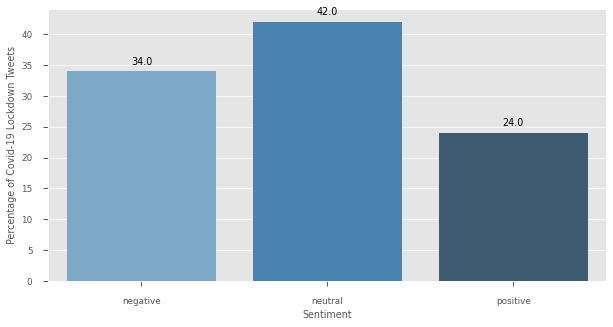

In [27]:
# Visualise percentage of posts with each sentiment

#### Plot settings ####
style.use('seaborn-poster') # sets the size of the charts
style.use('ggplot')
matplotlib.rcParams['font.family'] = "DejaVu Sans"
plt.rcParams['figure.figsize'] = [10, 5]
sns.set_context('paper')

ax = sns.barplot(x="sentiment_label",
                 y="percentage_of_total",
                 data=tweets_per_sentiment,
                 palette=("Blues_d")
                )

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

ax.set(xlabel='Sentiment', ylabel='Percentage of Covid-19 Lockdown Tweets')

plt.savefig('../Twitter_Output/Twitter_Jan_Mar_SentimentChart.png', dpi=400, bbox_inches="tight")

In [28]:
# Word Cloud Function

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

def generate_word_cloud(dataframe, category):
    comment_words = ''
    processed_text = dataframe['processed_text']
    
    # iterate through list
    for tweet_text in processed_text:
        # split the text into tokens
        tokens = tweet_text.split()
        # Append tokens to string comment_words
        comment_words += " ".join(tokens)+" "

    # make a word cloud
    wordcloud = WordCloud(width = 800, height = 800,
                    background_color ='black', colormap='rainbow',
                    #stopwords = stopwords,
                    min_font_size = 10).generate(comment_words)

    # plot the word cloud image                      
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)

    plt.show()
    wordcloud.to_file(f'../Twitter_Output/Twitter_Jan_Mar_Wordcloud_{category}.png')

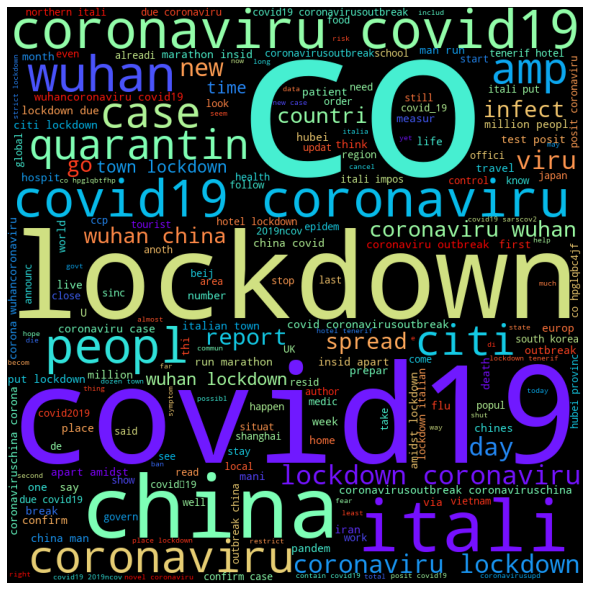

In [29]:
# All Sentiment Word Cloud

generate_word_cloud(tweets, 'all')

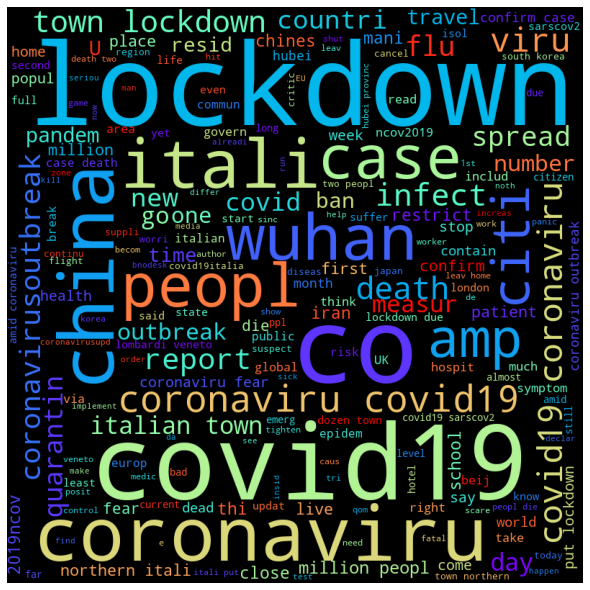

In [30]:
# Negative Sentiment DataFrame

negative = tweets[tweets['sentiment_label'] == 'negative']
generate_word_cloud(negative, 'negative')

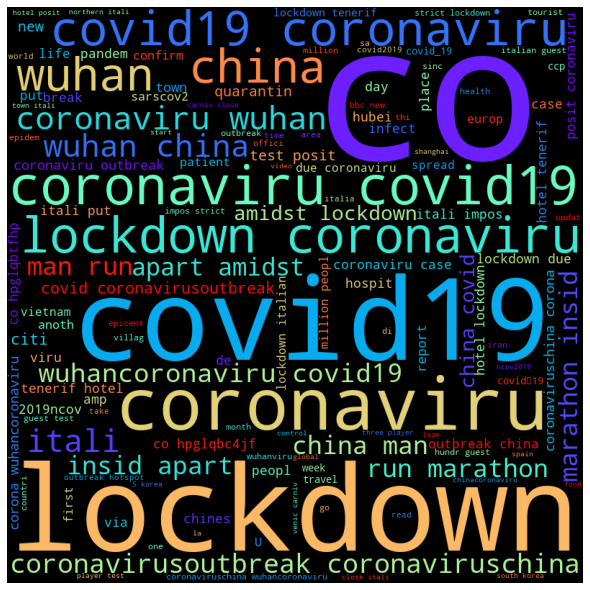

In [31]:
# Neutral Sentiment DataFrame

neutral = tweets[tweets['sentiment_label'] == 'neutral']
generate_word_cloud(neutral, 'neutral')

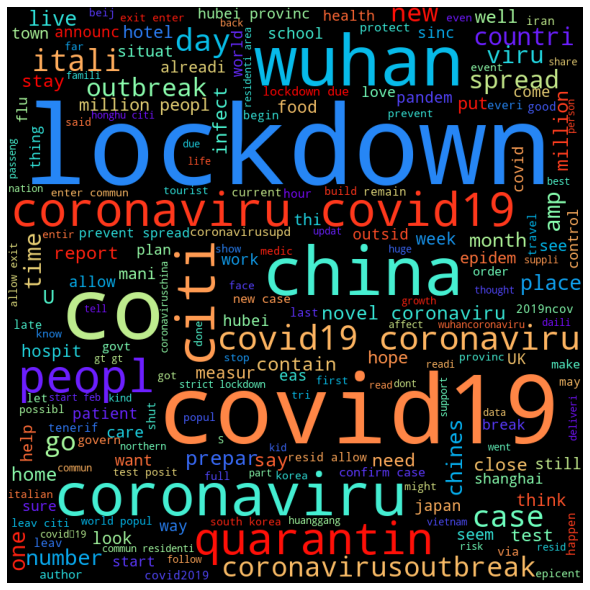

In [32]:
# Positive Sentiment DataFrame

positive = tweets[tweets['sentiment_label'] == 'positive']
generate_word_cloud(positive, 'positive')

In [33]:
# Export to a CSV

# path = "./Twitter_Sentiments/"
# if not os.path.exists(path):
#         os.makedirs(path)

tweets.to_csv('./Twitter_Jan_Mar_Sentiments.csv') 